In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

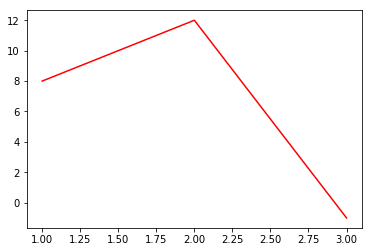

In [2]:
#plt.plot([1, 2, 3], [8, 12, -1])
plt.plot(np.array([1, 2, 3]), np.array([8, 12, -1]), c='red')

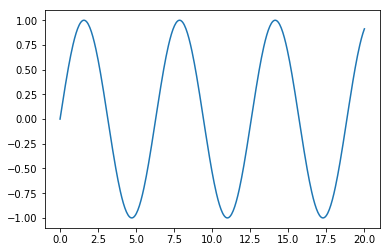

In [3]:
X = np.linspace(0, 20, 400)
Y = np.sin(X)
plt.plot(X, Y)

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = X.reshape(-1, 1) # -1 means infer dimension aka use whatever you find
model.fit(X, Y)
model.coef_

array([-0.01925885])

In [5]:
Y_pred = model.predict(X)

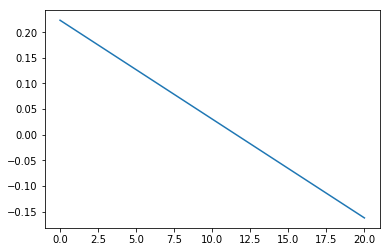

In [6]:
plt.plot(X, Y_pred)

In [7]:
linear_score = model.score(X, Y)
print(f'the score was {linear_score}')

the score was 0.02538029727503377


Now we want to try a __polynomial regression__.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
mynewfeatures = PolynomialFeatures(4)
mynewfeatures.fit(X) # expected to use .transform but actually have to use .fit first
expanded_X = mynewfeatures.transform(X)
expanded_X.shape

(400, 5)

In [9]:
model = LinearRegression()
model.fit(expanded_X, Y) # fit lines in 5d space
model.coef_

array([ 0.00000000e+00, -7.21753745e-01,  1.34166821e-01, -9.47015662e-03,
        2.23215228e-04])

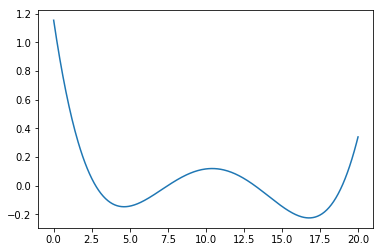

In [10]:
Y_with_poly = model.predict(expanded_X)
plt.plot(X, Y_with_poly)

We used the separate steps of the process manually, but it's much nicer to use scikit make_pipeline to do that.

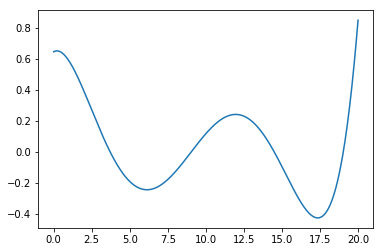

In [11]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(5), LinearRegression())
#model = make_pipeline(PolynomialFeatures(3), PolynomialFeatures(2), LinearRegression())
model.fit(X, Y)
predicted_Y = model.predict(X)
plt.plot(X, predicted_Y)